# Synthetic Dataset Project

## P1. Dataset Generator

### Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

### Parameters for each class

In [4]:
params = {
    "LowRisk": {
        "income": (85000, 15000),
        "age": (44, 10),
        "credit_score": (760, 30),
        "debt_ratio": (0.22, 0.10),
        "loan_amount": (12000, 5000)
    },
    "MediumRisk": {
        "income": (55000, 12000),
        "age": (37, 12),
        "credit_score": (660, 40),
        "debt_ratio": (0.38, 0.15),
        "loan_amount": (18000, 7000)
    },
    "HighRisk": {
        "income": (32000, 8000),
        "age": (30, 8),
        "credit_score": (550, 50),
        "debt_ratio": (0.58, 0.20),
        "loan_amount": (25000, 10000)
    }
}

### Sample size per class

In [5]:
samples_per_class = 2000   # Total = 6000 samples

### Function to create data for one class

In [6]:
def generate_class_data(class_name, params, n_samples):
    """Generate synthetic samples for a given risk class."""
    cls_params = params[class_name]

    data = {
        "income": np.random.normal(cls_params["income"][0], cls_params["income"][1], n_samples),
        "age": np.random.normal(cls_params["age"][0], cls_params["age"][1], n_samples),
        "credit_score": np.random.normal(cls_params["credit_score"][0], cls_params["credit_score"][1], n_samples),
        "debt_ratio": np.random.normal(cls_params["debt_ratio"][0], cls_params["debt_ratio"][1], n_samples),
        "loan_amount": np.random.normal(cls_params["loan_amount"][0], cls_params["loan_amount"][1], n_samples),
        "risk_class": [class_name] * n_samples
    }
    return pd.DataFrame(data)

### Append all classes in dataframe list

In [7]:
df_list = []

for cls in params.keys():
    df_list.append(generate_class_data(cls, params, samples_per_class))

df = pd.concat(df_list, ignore_index=True)

##### Print the dataframe to monitor successful appending of classes

In [8]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (6000, 6)


,income,age,credit_score,debt_ratio,loan_amount,risk_class
0,79916.593147,36.814405,783.833290,0.206891,18533.299437,LowRisk
1,70365.245519,58.449801,732.336272,0.012315,5566.557183,LowRisk
2,94680.833903,41.955482,782.756549,0.074274,17118.780147,LowRisk
3,81628.887720,48.376025,784.797884,0.132730,20411.224042,LowRisk
4,63500.145656,48.900076,746.489036,0.097375,6248.252195,LowRisk


### Save to out.csv inside Dataset folder

In [9]:
folder_name = "Dataset"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
    print(f"Folder '{folder_name}' created.")
else:
    print(f"Folder '{folder_name}' already exists.")

# Source - https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
# Posted by Andy Hayden, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-11, License - CC BY-SA 4.0

df.to_csv("Dataset\out.csv", encoding='utf-8', index=False, header=True)

Folder 'Dataset' already exists.


---
---
## P2. Exploratory Data Analysis (EDA)

### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### !! Load Synthetic Dataset !!
- to avoid overwriting and recreating everytime, and load the dataset premade before

In [ ]:
df = pd.read_csv('Dataset\out.csv')

         income        age  credit_score  debt_ratio   loan_amount risk_class
0  79916.593147  36.814405    783.833290    0.206891  18533.299437    LowRisk
1  70365.245519  58.449801    732.336272    0.012315   5566.557183    LowRisk
2  94680.833903  41.955482    782.756549    0.074274  17118.780147    LowRisk
3  81628.887720  48.376025    784.797884    0.132730  20411.224042    LowRisk
4  63500.145656  48.900076    746.489036    0.097375   6248.252195    LowRisk


### Encode labels with Train/Test split

In [18]:
le = LabelEncoder()
df["risk_label"] = le.fit_transform(df["risk_class"])

X = df[["income", "age", "credit_score", "debt_ratio", "loan_amount"]]
y = df["risk_label"]

# test_size=0.30 has 1800 samples in test set (30% of 6000)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((4200, 5), (1800, 5))

### Inspect current Data

In [19]:
print("Dataset Overview:\n", df.head())
print("\nSummary Statistics:\n", df.describe())
print("\nClass Distribution:\n", df['risk_class'].value_counts())

Dataset Overview:
          income        age  credit_score  debt_ratio   loan_amount risk_class  \
0  79916.593147  36.814405    783.833290    0.206891  18533.299437    LowRisk   
1  70365.245519  58.449801    732.336272    0.012315   5566.557183    LowRisk   
2  94680.833903  41.955482    782.756549    0.074274  17118.780147    LowRisk   
3  81628.887720  48.376025    784.797884    0.132730  20411.224042    LowRisk   
4  63500.145656  48.900076    746.489036    0.097375   6248.252195    LowRisk   

   risk_label  
0           1  
1           1  
2           1  
3           1  
4           1  

Summary Statistics:
               income          age  credit_score   debt_ratio   loan_amount  \
count    6000.000000  6000.000000   6000.000000  6000.000000   6000.000000   
mean    57186.239131    37.102446    656.398268     0.392533  18334.682522   
std     24833.162352    11.465059     96.135941     0.213355   9240.046266   
min      5637.842530     0.421804    390.214438    -0.177927  -9

### Distribution of each features

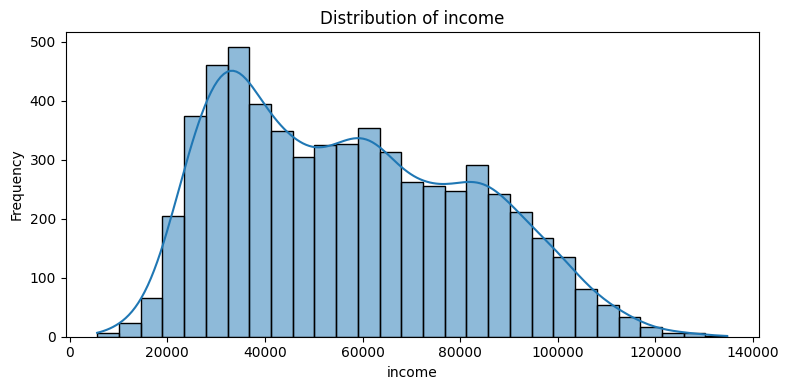

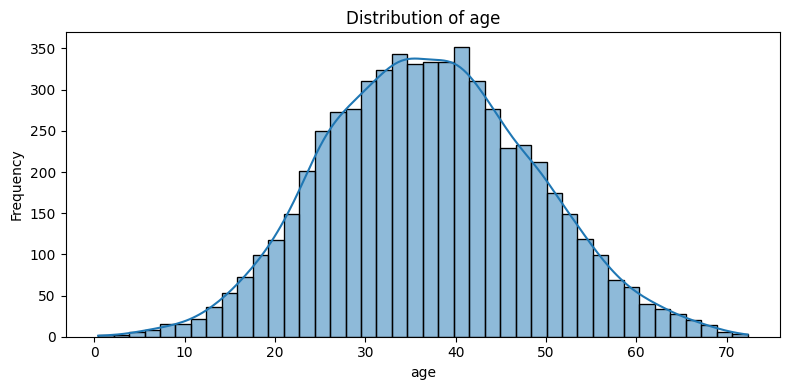

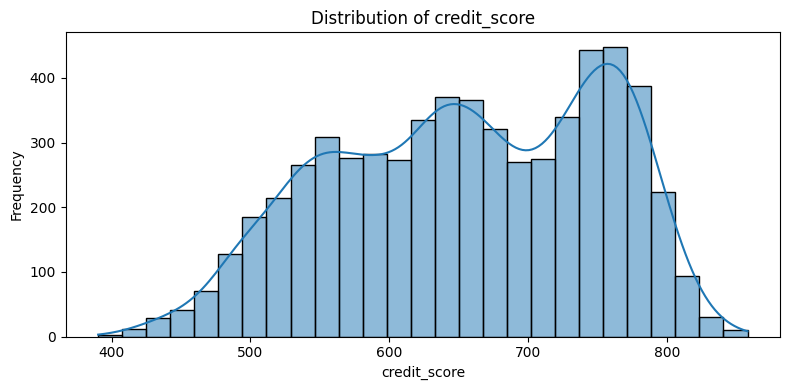

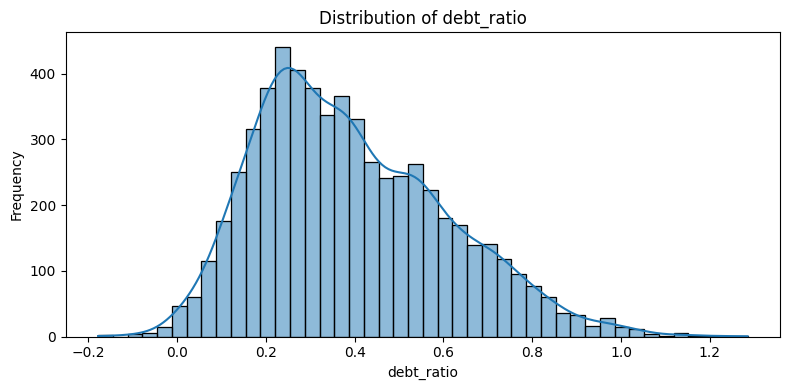

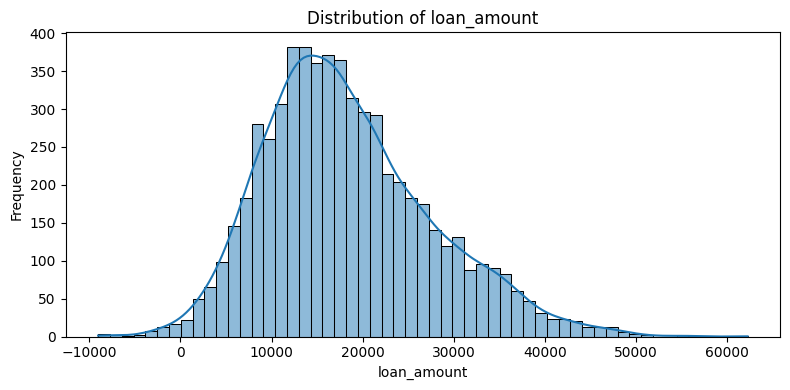

In [20]:
numeric_features = ['income', 'age', 'credit_score', 'debt_ratio', 'loan_amount']

for col in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()